# Netflix 1



In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [102]:
netflix_dataset=pd.read_csv("netflix_dataset.csv")
netflix_dataset.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [103]:
netflix_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [104]:

dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())



              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769


In [105]:
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())



Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


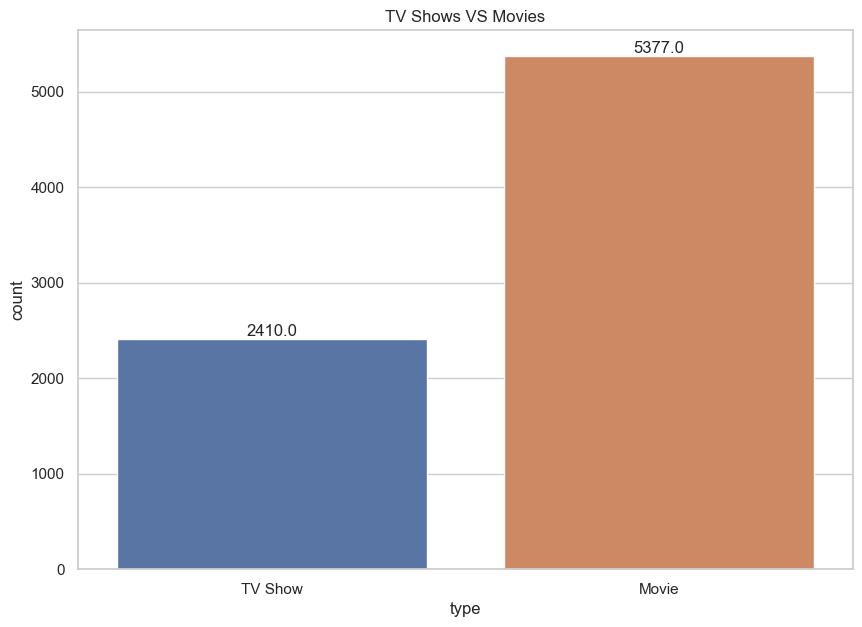

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
ax = sns.countplot(x="type", data=netflix_dataset)
ax.set_title("TV Shows VS Movies")

# Agregar los totales encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=12)

plt.show()




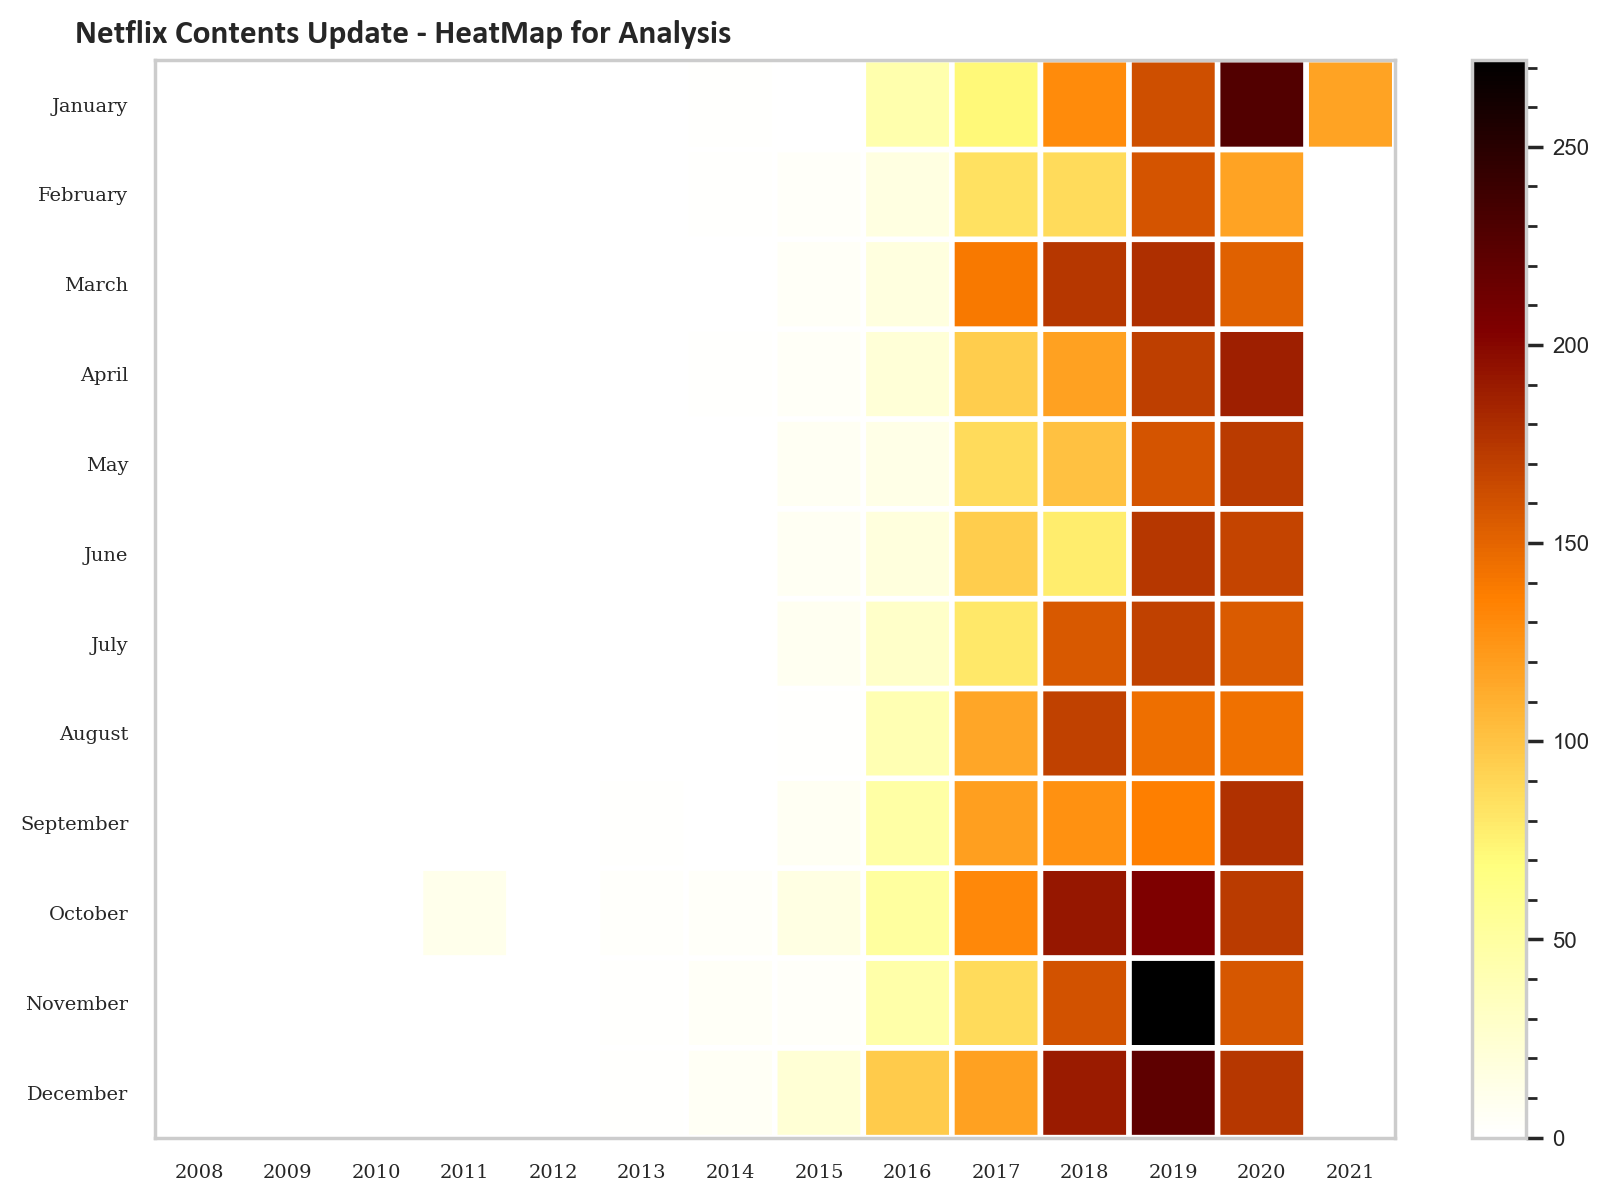

In [107]:
netflix_date = netflix_dataset[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)  # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

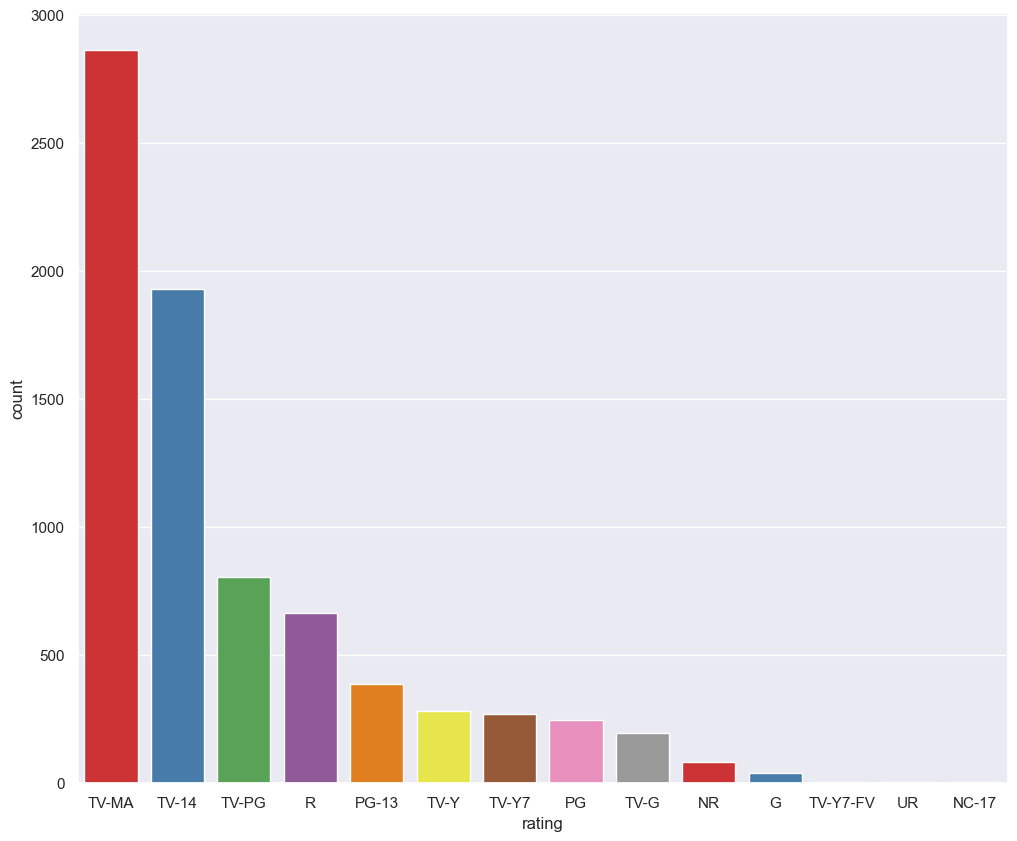

In [108]:
#Analisis de las calificaciones de peliculas
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])




In [109]:
imdb_ratings=pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

C:\Users\jaren\AppData\Local\Temp\ipykernel_5876\1738152228.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



(85852, 4)

In [110]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)



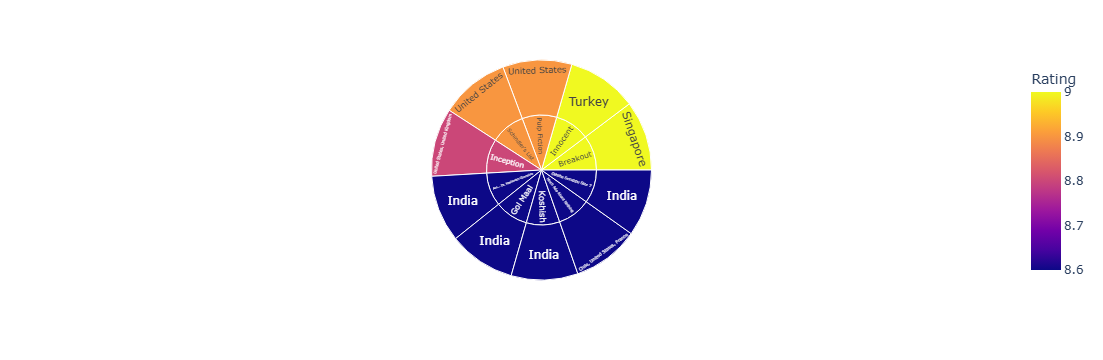

In [111]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()



In [112]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries






,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


In [113]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


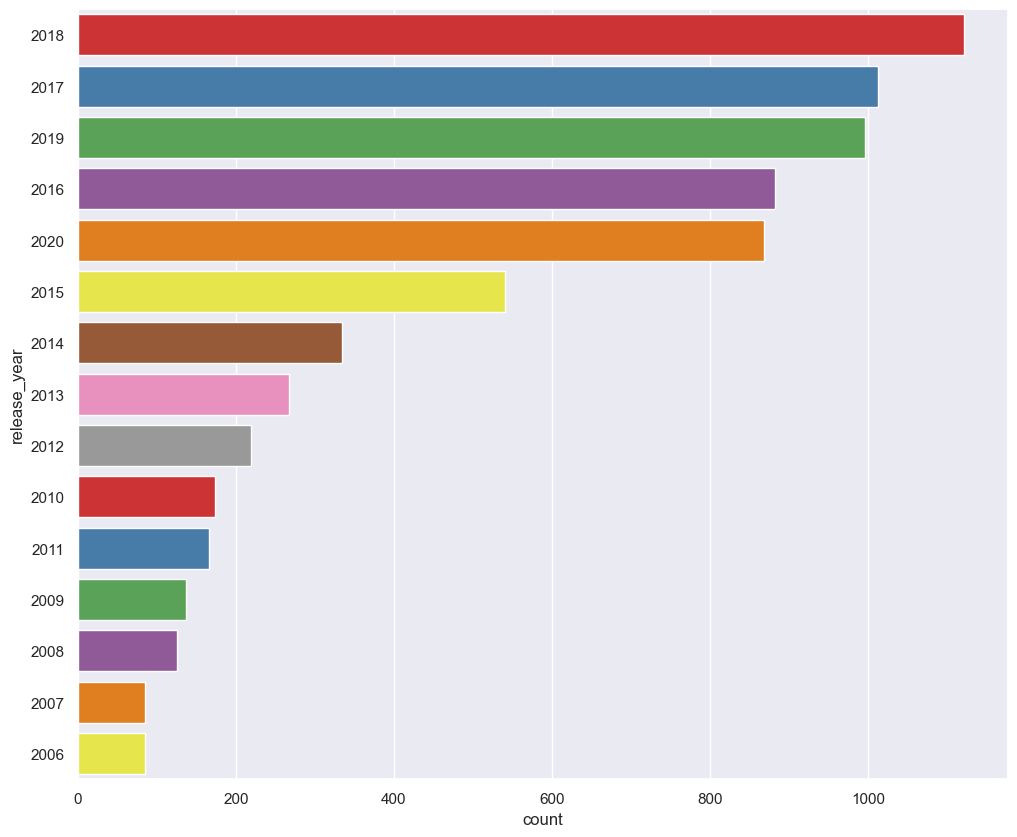

In [114]:
#Análisis anual
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset['release_year'].value_counts().index[0:15])



In [115]:
# Llenar valores nulos con 'Unknown'
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()

netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')

# Crear el diccionario de conteo
countries = {}

# Obtener la lista de valores
country_list = list(netflix_shows['country'])

# Recorrer cada entrada
for entry in country_list:
    # Dividir por comas y quitar espacios
    split_countries = [c.strip() for c in entry.split(',')]
    
    # Contar cada país
    for country in split_countries:
        if country in countries:
            countries[country] += 1
        else:
            countries[country] = 1

# Revisar resultado
countries

{'Brazil': 29,
 'Turkey': 28,
 'Poland': 8,
 'United States': 866,
 'Mexico': 53,
 'Unknown': 276,
 'Japan': 184,
 'South Korea': 157,
 'United Kingdom': 256,
 'India': 75,
 'Canada': 126,
 'Italy': 23,
 'Spain': 57,
 'Australia': 60,
 'Taiwan': 70,
 'China': 45,
 'Germany': 42,
 'France': 84,
 'Singapore': 22,
 'Russia': 17,
 'Mauritius': 1,
 'South Africa': 10,
 'Lebanon': 7,
 'Colombia': 28,
 'Argentina': 18,
 'Philippines': 1,
 'Finland': 4,
 'Netherlands': 8,
 'Chile': 5,
 'Thailand': 22,
 'Nigeria': 8,
 'Saudi Arabia': 4,
 'Syria': 1,
 'Egypt': 13,
 'Kuwait': 3,
 'Belgium': 11,
 'Norway': 9,
 'Sweden': 10,
 'Denmark': 13,
 'Israel': 8,
 'Ireland': 12,
 'Iceland': 2,
 'Indonesia': 3,
 'Malaysia': 8,
 'New Zealand': 8,
 'Czech Republic': 6,
 'Cuba': 1,
 'Austria': 1,
 'Greece': 2,
 'Hong Kong': 5,
 'Pakistan': 4,
 'Luxembourg': 1,
 'Jordan': 1,
 'Uruguay': 1,
 'Azerbaijan': 1,
 'West Germany': 2,
 'Puerto Rico': 1,
 'Malta': 1,
 'Senegal': 1,
 'Ukraine': 2,
 'Switzerland': 1,
 'Bel

In [116]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}




[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'SouthKorea'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'France'),
 Text(7, 0, 'India'),
 Text(8, 0, 'Taiwan'),
 Text(9, 0, 'Australia')]

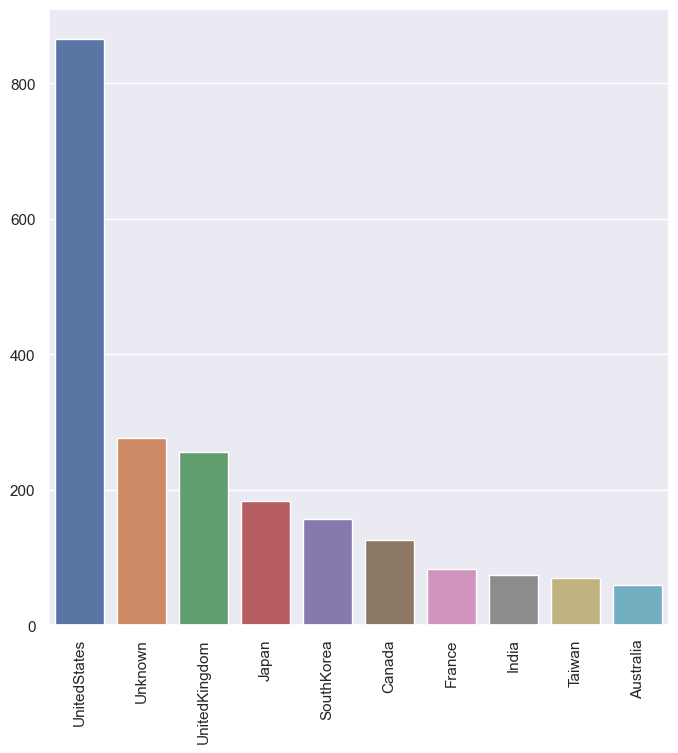

In [117]:

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)


In [118]:
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie'].copy()

netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']




1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

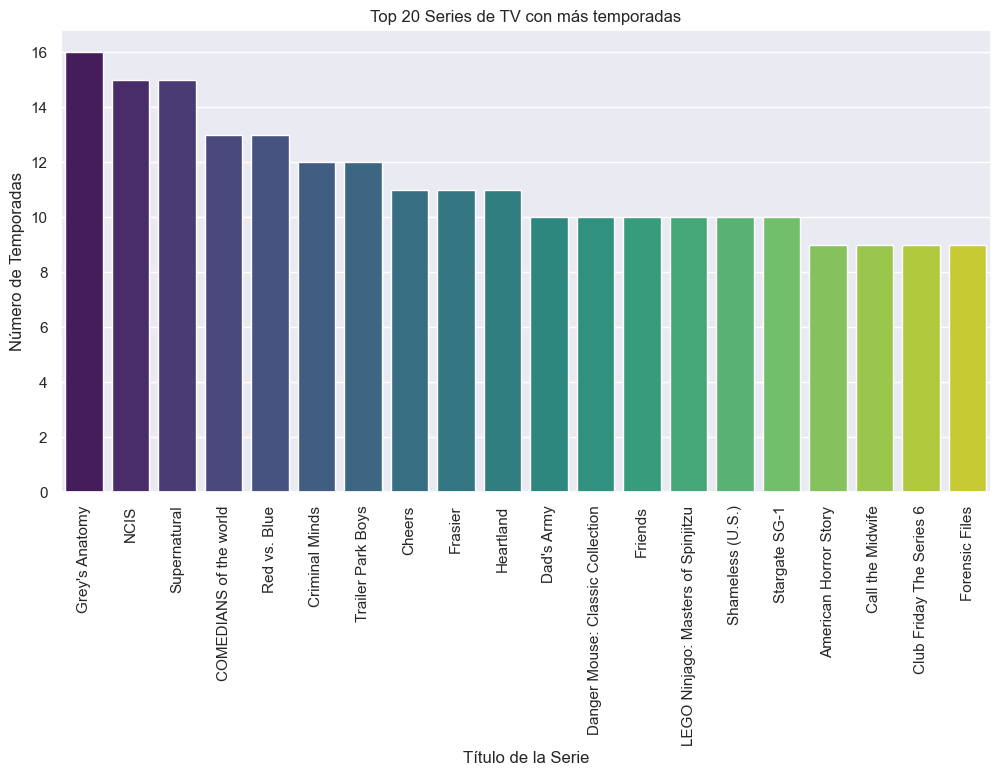

In [119]:
# Filtrar solo Series de TV
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()

# Limpiar la columna 'duration' para extraer el número de temporadas
# Quitar texto como ' Season' o ' Seasons'
netflix_shows['duration'] = netflix_shows['duration'].str.replace(' Seasons','', regex=False)
netflix_shows['duration'] = netflix_shows['duration'].str.replace(' Season','', regex=False)

# Manejar nulos o texto raro
netflix_shows['duration'] = netflix_shows['duration'].fillna('0')
netflix_shows['duration'] = netflix_shows['duration'].astype(int)

# Obtener las 20 series con más temporadas
top20_seasons = netflix_shows.nlargest(20, 'duration')

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='duration', data=top20_seasons, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Series de TV con más temporadas')
plt.xlabel('Título de la Serie')
plt.ylabel('Número de Temporadas')
plt.show()





C:\Users\jaren\AppData\Local\Temp\ipykernel_5876\2338713896.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




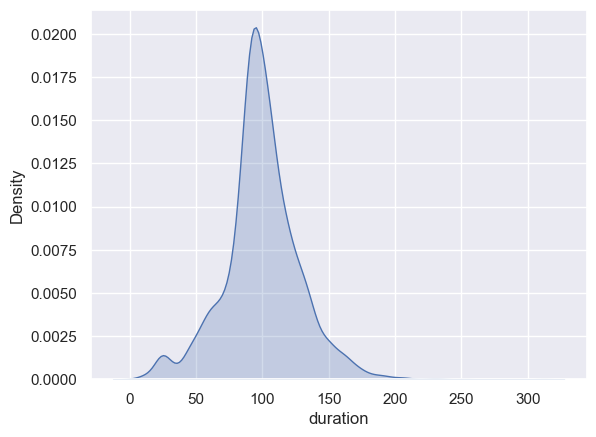

In [120]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)


In [121]:
features = ['title', 'duration']
durations = netflix_shows[features]

# Convierte la columna 'duration' a tipo string antes de usar .str.replace()
durations['duration'] = durations['duration'].apply(str)

# Realiza el reemplazo
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')

# Realiza el segundo reemplazo para quitar las 's'
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')

# Si es necesario, conviértelo a entero
#durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)

# Verifica los resultados
print(durations['no_of_seasons'])





0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: no_of_seasons, Length: 2410, dtype: object


C:\Users\jaren\AppData\Local\Temp\ipykernel_5876\2867944509.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jaren\AppData\Local\Temp\ipykernel_5876\2867944509.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jaren\AppData\Local\Temp\ipykernel_5876\2867944509.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [122]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)






C:\Users\jaren\AppData\Local\Temp\ipykernel_5876\2836689634.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)


<Axes: xlabel='title'>

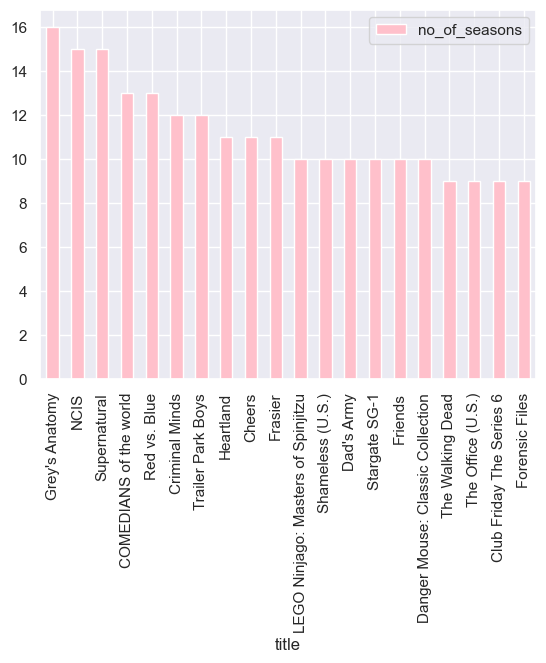

In [124]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='pink')





In [125]:
#Recomendador basado en descripción de la trama (Recomendaciones basadas en contenido)

netflix_dataset['description'].head()


0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [126]:
# Sistema de recomendación (basado en contenido)

# Importar TfIdfVectorizer desde scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Definir un objeto vectorizador TF-IDF. Eliminar todas las palabras vacías en inglés, como "the", "a", etc.
tfidf = TfidfVectorizer(stop_words='english')

# Reemplazar NaN con una cadena vacía
netflix_dataset['description'] = netflix_dataset['description'].fillna('')

# Construir la matriz TF-IDF requerida ajustando y transformando los datos
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

# Generar la forma de tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [127]:
# Generar la forma de tfidf_matrix
from sklearn.metrics.pairwise import linear_kernel

# Calcular la matriz de similitud de coseno
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



In [128]:
#Construir un mapa inverso de índices y títulos de películas
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

In [129]:
# Función que toma el título de la película como entrada y genera la mayoría de las películas similares
def get_recommendations(title, cosine_sim=cosine_sim):
# Obtener el índice de la película que coincide con el título
    idx = indices[title]

# Obtenga las puntuaciones de similitud de pares de todas las películas con esa película
    sim_scores = list(enumerate(cosine_sim[idx]))

# Ordena las películas según los puntajes de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Obtén las puntuaciones de las 10 películas más similares
    sim_scores = sim_scores[1:11]

# Obtener los índices de la película
    movie_indices = [i[0] for i in sim_scores]

# Devuelve el top 10 de películas más similares
    return netflix_dataset['title'].iloc[movie_indices]
    

In [130]:
get_recommendations('Welcome')



1761                  Dil Vil Pyaar Vyaar
6782                The Princess Weiyoung
866                               Bewafaa
3082                     It's Okay, Buddy
7245                           True Tunes
2472                             Gomorrah
302                      Acts of Violence
3859                          Magnificent
4938    Power Rangers Operation Overdrive
4692                        Our Godfather
Name: title, dtype: object

In [131]:
get_recommendations('Avengers: Infinity War')

6920                              The Talented Mr. Ripley
6270                                         The Darkness
400                                Aliens Ate My Homework
3589              LEGO Marvel Super Heroes: Black Panther
1338                       Chilling Adventures of Sabrina
7446                                              Vroomiz
4678                                            Orbiter 9
1448                                           Code Lyoko
7388                                             Vampires
3590    LEGO Marvel Super Heroes: Guardians of the Galaxy
Name: title, dtype: object

In [132]:
get_recommendations('Dil Dhadakne Do')


6464                     The House of Flowers
4603                                Old Money
377                                     Alelí
593                           Ascharyachakit!
5171                                  Results
1123                                 Budapest
3916                           Mansfield Park
5662        Sleepless Society: Bedtime Wishes
1192                         Can You Hear Me?
3583    LEGO Friends: The Power of Friendship
Name: title, dtype: object

In [133]:
get_recommendations('The Letter for the King')



6788                                   The Protector
659       Baahubali: The Beginning (English Version)
4480                                        NiNoKuni
660         Baahubali: The Beginning (Hindi Version)
662         Baahubali: The Beginning (Tamil Version)
2337                                        Galavant
661     Baahubali: The Beginning (Malayalam Version)
3862                                      Mahabharat
5888                      Super Bheem Bana Vajraveer
374                   Albion: The Enchanted Stallion
Name: title, dtype: object

In [134]:
get_recommendations('Criminal Minds')


833            Beneath the Leaves
497     An Unremarkable Christmas
5882             Sunday's Illness
3533                        Larva
1260                   Chal Bhaag
4109                   MINDHUNTER
2646            Hasta los dientes
267                Aakhri Adaalat
1039                 Bondi Rescue
2073                       Extras
Name: title, dtype: object

In [137]:
get_recommendations('Ojos Bien Cerrados' )
//no esta

                    






SyntaxError: invalid syntax (2219689974.py, line 2)

In [140]:
get_recommendations('Madagascar')

KeyError: 'Madagascar'

In [141]:
#Rellenar valores nulos con una cadena vacía.
filledna=netflix_dataset.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [142]:
#Limpieza de datos: convertir todas las palabras en minúsculas
def clean_data(x):
        return str.lower(x.replace(" ", ""))
    

In [143]:
#Identificar las características sobre las que se filtrará el modelo.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]




In [144]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()




,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


In [145]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)




In [146]:
# Importa CountVectorizer y crea la matriz de conteo
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])


In [147]:
# Calcule la matriz de similitud de coseno basándose en count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)




In [148]:
# Restablecer el índice de nuestro DataFrame principal y construir un mapeo inverso como antes
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [149]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    
# Obtener las puntuaciones de similitud de todos los títulos respecto a ese título
    sim_scores = list(enumerate(cosine_sim[idx]))

# Ordenar los títulos en función de las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Obtener las puntuaciones de los 10 títulos más similares
    sim_scores = sim_scores[1:11]

# Obtener los índices de los títulos
    movie_indices = [i[0] for i in sim_scores]

# Devolver los 10 títulos más similares
    return netflix_dataset['title'].iloc[movie_indices]
    


In [150]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [151]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

7058                               Thor: Ragnarok
5698                      Solo: A Star Wars Story
2700                                          Her
5118                                   Real Steel
5699    Solo: A Star Wars Story (Spanish Version)
959                                 Black Panther
3006                                     Inkheart
5632                                  Singularity
1741                   Di Renjie zhi Sidatianwang
2586                      Halo: The Fall of Reach
Name: title, dtype: object

In [152]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

7769    Zindagi Na Milegi Dobara
362                     AK vs AK
6878             The Sky Is Pink
1757              Dil Chahta Hai
3912                        Mann
4872                          PK
2571                      Haapus
886               Bhangra Paa Le
5954            Taare Zameen Par
1261             Chal Dhar Pakad
Name: title, dtype: object

In [153]:
get_recommendations_new('Criminal Minds', cosine_sim2)




4109                     MINDHUNTER
6876                     The Sinner
2282                      Frequency
6524                    The Keepers
6900                  The Staircase
1772                     Dirty John
2844    How to Get Away with Murder
5027                       Quantico
5711              Somewhere Between
2052                    Evil Genius
Name: title, dtype: object

In [154]:
get_recommendations_new('The Letter for the King', cosine_sim2)

3898                  Man vs Wild with Sunny Leone
4047                                        Merlin
5678                                       Smoking
2846    How to Live Mortgage Free with Sarah Beeny
2124                                 Fatal Destiny
6788                                 The Protector
350                       Ainsley Eats the Streets
398                                   Alien Worlds
449                              Amazing Interiors
2048                             Everyday Miracles
Name: title, dtype: object